# Application of Deep Learning for Natural Langage Processing (NLP) 1 : A first example
## Practical work - ENIB - Artificial Intelligence and Simulation module 
**Pierre De Loor**


During this practical work, you will learn how ML can be used to process Natural Langage. We considere that the starting material are sentences syntaxically encoded (ASCII or other encoding) but not vocal signal which is another step for a full NLP system). 


From these sentences, different tasks can be done :


1.   Sentiment analysis : allows the classification of a text among different classes
2.   Translation from one langage to another
3.   Completion of sentences or texts
4.   Generation of answers

Even if there are a lot of technics to adress these tasks - statistics,linguistics knowledges, grammatical rules, logical inferences ([follow this link for more details](https://https://en.wikipedia.org/wiki/History_of_natural_language_processing))) - we will study the case of machine learning applications. As for artificial vision, the hope of the use of Deep Learning for NLP is to avoid the search of explicit knowledges about linguistics and grammar and to let the algorithm found them in the form of numerical values that define Deep Learning models. 

The material I used to produce this notebook is mainly :
1. Hands on natural langage processing with python: A practical guide to applying deep learning architectures to your NLP applications (Rajesh Arumugam and Rajalingappaa Shanmugamani)
3. Deep learning with python (François Chollet)

First, you must verify that keras is well accessible on your system:

In [ ]:
import keras
keras.__version__

'2.6.0'

Then we will study a first database that consist of binary labelled text

# IMDB data
IMDB dataset is a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary (integer encoding).

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded):

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



The argument `num_words=10000 ` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":


In [ ]:
print(train_data[0])
print("lenght : ", len(train_data[0]))


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
lenght :  218


In [ ]:
train_labels[0]

1

For kicks, here's how you can quickly decode one of these reviews back to English words:

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[3]])

In [ ]:
print(train_labels[3])
print(decoded_review)

1
? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our pro

# Question 1.1
* What is the review of the 4th film ? What is it's class ? (`positive` or `negative` ?) 

la review du 4ème film est `positive`.

* If you plane to learn these classes, which inputs did you use for a machine learning algorithm ? 

L'entrée du réseau de neurones pourrait être la review sous forme d'entier. Cependant, chaque review a un nombre différent de mot et le réseau de neurones doit avoir un nombre précis d'entrée. La solution serait donc de passer en entrée un dictionnaire de mot représenté par une liste de 0 et de 1 correspondant à l'apparition ou non du mot dans la review.

* What difficulties do you think you will encounter ?

Les reviews peuvent être sarcastiques ou ironiques.

# A first neural network to learn text classification


# Encoding the data

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

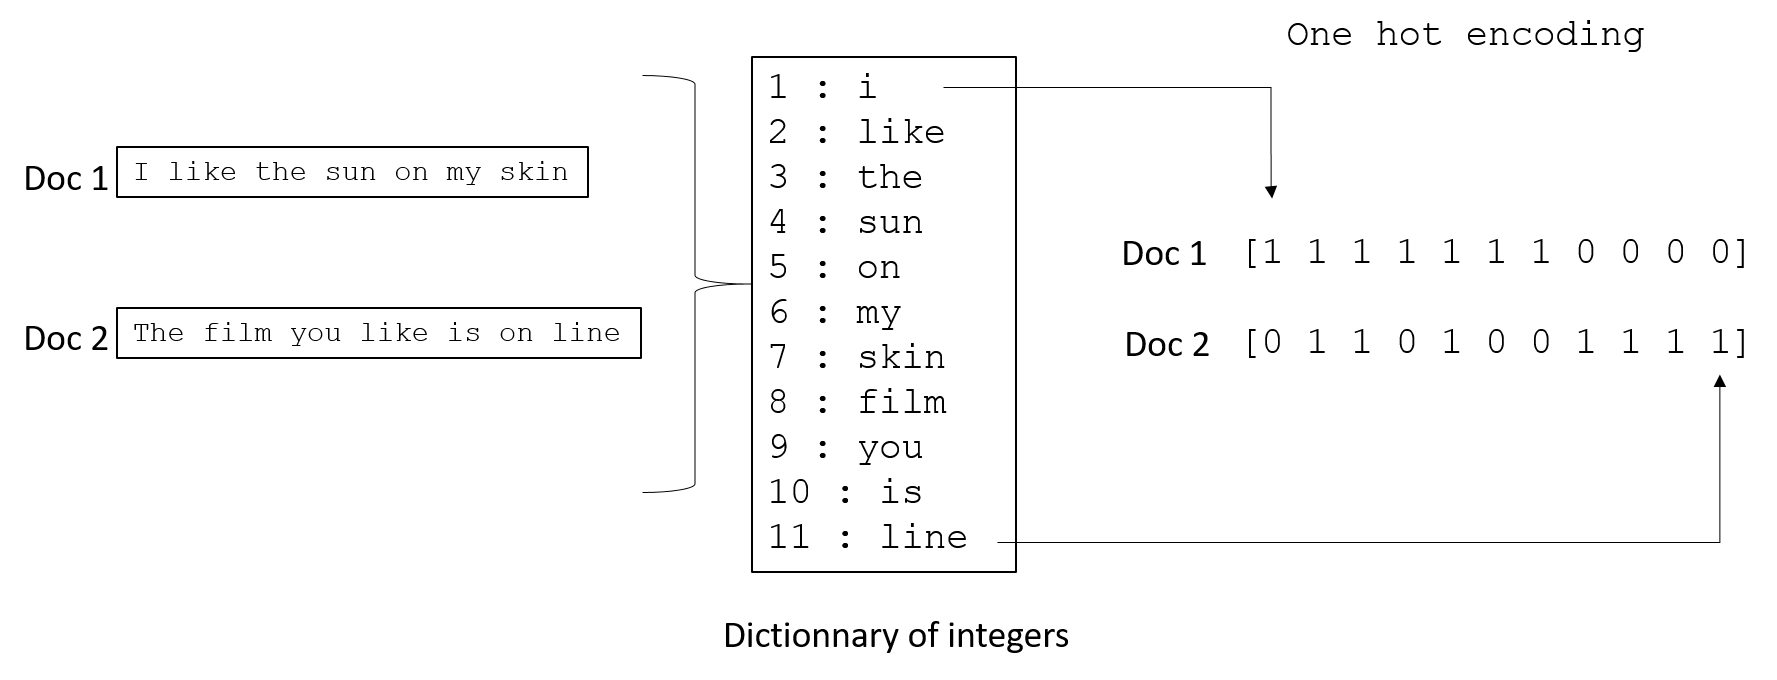

Question : 

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Now, one sequence is such a vector :

In [ ]:
print(x_train[0])
print(x_train[0][0])
print(x_train[0][1])
print(x_train[0][16])
print(x_train[0][1622])
print(x_train[0].size)
print(x_train[1].size)

print(x_train.size)



[0. 1. 1. ... 0. 0. 0.]
0.0
1.0
1.0
1.0
10000
10000
250000000


**Question**

Can you explain the values that are returned by the algorithm.

`x_train[0]` correspond au dictionnaire de mot (0 ou 1) de la première review

`x_train[0][0]` correpond au premier mot du dictionnaire de mot de la première review

`x_train[0][1622]` correpond au 1622ème mot du dictionnaire de mot de la première review

`x_train[0].size` correspond à la taille du dictionnaire de mot (identique pour chaque review)

 `x_train.size` correspond aux 10 000 mots du dictionnaire de mot multiplié par les 25 000 review de la base de donnée d'entrainnement.   10000x25000=250000000

To vectorize the labels we just have to write :

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building the network

Our input data is simply vectors, and our labels are scalars (1s and 0s). A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with `relu` activations (for instance: `Dense(16, 
activation='relu')` for 16 hidden units), a binary cross entropy loss function (see [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/) for its definition) and an RMSprop optimizer (see its specificity  [here](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a))






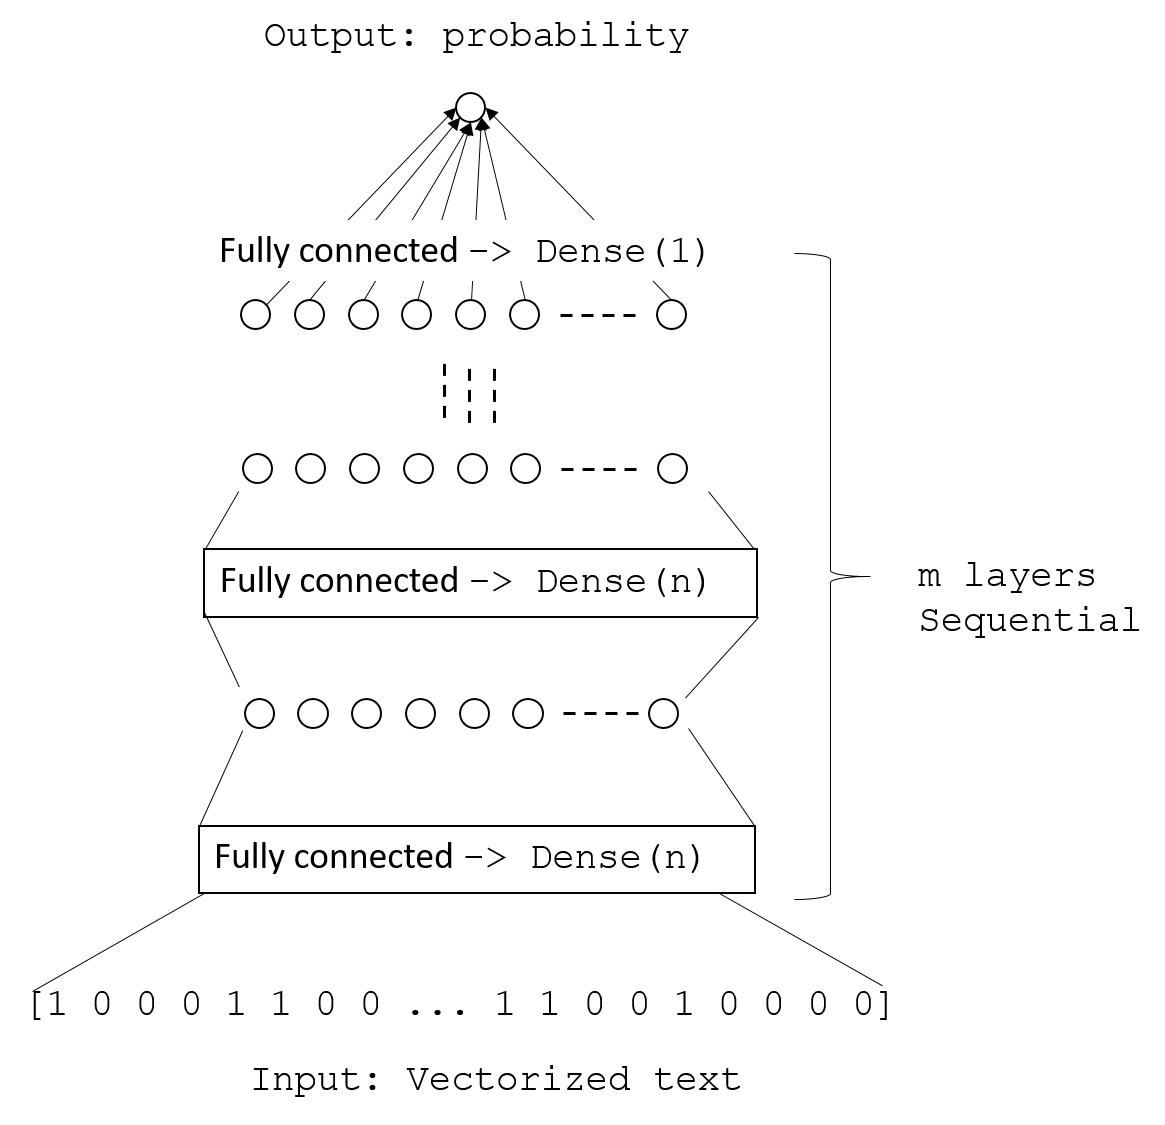

For the moment, we will start with the following architecture choice: two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review. The intermediate layers will use relu as their "activation function", and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid "squashes" arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 samples. 
A **mini-batch** is a sub-set of the training data. The model is uptaded after each mini-batch. After one iteration (also named **epochs**), all the training data are processed by the algorithm. The choice of using mini-batch or not is out of this course but is a parameter that can influence the performance of the gradient descent during learning.
We will also monitor `loss` and `accuracy` on the 10,000 samples that we set apart. This is done by passing the validation data as the `validation_data` argument:



In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5129 - accuracy: 0.7884 - val_loss: 0.3815 - val_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3021 - accuracy: 0.9021 - val_loss: 0.3089 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2201 - accuracy: 0.9281 - val_loss: 0.2797 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1744 - accuracy: 0.9434 - val_loss: 0.3451 - val_accuracy: 0.8621
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1449 - accuracy: 0.9537 - val_loss: 0.2814 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1173 - accuracy: 0.9653 - val_loss: 0.2942 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.3138 - val_accuracy: 0.8819
Epoch 8/20
30

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:


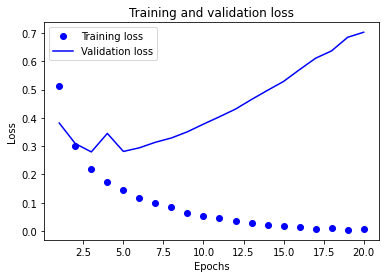

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

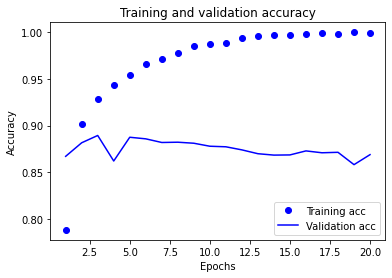

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Question 1.2
* What is best loss/accuracy finded by the algorithm ?

A 3 epochs le rapport est le mieux entre loss et accuracy.

la `loss` est de 0.3 pour la base de donnée de training et de validation.

l'`accuracy` est de environ 0.9 pour la base de donnée de training et de validation.

* Can you explain these curves ?

Lorsque le nombre d'epoch augmente, le réseau de neurones travaille de plus en plus à apprendre les caractéristiques de plus en plus précise de la base de donnée de training. Lorsqu'on lui donne la base de validation, il a appris précisement la base de training et commet alors beaucoup d'erreurs.

* What is the name of the observed phenomena ?

Ce phénomène s'appelle l'overfitting.

* What do you propose to improve them ?

Le plus simple est de réduire le nombre d'epochs. Autrement, différentes solutions sont possibles :

-> augmenter la base de données d'entrainnement

-> réduire la taille du modèle en diminuant le nombre de paramètres.

-> ajouter un coût aux poids (weights) avec une grande valeur pour réduire les tendances trop importantes.

-> le dropout, c'est à dire supprimer des noeuds aléatoirement.

The predictions done for each test data is obtain with:

In [ ]:
model.predict(x_test)

array([[0.00604182],
       [1.        ],
       [0.9825299 ],
       ...,
       [0.0056912 ],
       [0.00968489],
       [0.8378403 ]], dtype=float32)

One of the goal is to optimize this accuracy (for this example some proposition lead to an accuracy of 95%). For that, the model could be changed (number of layers, number of cells) but often, a preprocessing of the data is a better choice. For instance, **in the previous example, the sequences of the words in the documents are not encoded. The number of occurences of each word in the documents are not encoded too... It could be relevant to identifying certain patterns that could have a "signification".**

#Question 1.3 : 
* For the 10 first x_test data, print the value of the labels of the data (found in the database) and a the value computed by the model.

* Among this 10 cases, identify one data with a value that seems clearly not valuated by the algortihm

* Print the content of these data and try to explain what can be the problem ? 

In [ ]:
model_predict = model.predict(x_test)

for i in range(10):
  print("data ",i)
  print(y_test[i])
  print(model_predict[i][0]) 
  print("\n")

data  0
0.0
0.006041825


data  1
1.0
1.0


data  2
1.0
0.9825299


data  3
0.0
0.9918374


data  4
1.0
0.9968051


data  5
1.0
0.99993956


data  6
1.0
0.14559993


data  7
0.0
0.00014019012


data  8
0.0
0.96116513


data  9
1.0
1.0




In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[8]])

print(decoded_review)


? just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and ? lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens ? ? did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the concept you might get the feeling that this is one of those ? movies about an amazing triumph covered with over the top music and trying to have us fully convinced of what a great story it is telling but then not letting us in ? this is not that movie the people tell the story this does such a good job of capturing every moment of their involvement while we enter their world and feel every second with them there is so much beyond the climb that makes everything they go through so much more tense touching the void was also a great doc about mountain climbing and showing the in

La review fait probablement preuve d'irronie et par conséquent utilise des mots pour glorifier le film. L'occurence de ces mots envoie l'algorithme en erreur.

# Question 1.4

* Try to use 1 or 3 hidden layers

* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...

* For the fourth combination of number of layers and number of units, give the best accuracy obtained. 




Epoch 1/10
30/30 [==============================] - 2s 52ms/step - loss: 0.4718 - accuracy: 0.8041 - val_loss: 0.3565 - val_accuracy: 0.8754
Epoch 2/10
30/30 [==============================] - 1s 37ms/step - loss: 0.2831 - accuracy: 0.9087 - val_loss: 0.3185 - val_accuracy: 0.8700
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.2178 - accuracy: 0.9304 - val_loss: 0.3258 - val_accuracy: 0.8650
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1781 - accuracy: 0.9433 - val_loss: 0.2729 - val_accuracy: 0.8894
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1473 - accuracy: 0.9547 - val_loss: 0.2754 - val_accuracy: 0.8897
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1240 - accuracy: 0.9635 - val_loss: 0.2928 - val_accuracy: 0.8837
Epoch 7/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1073 - accuracy: 0.9697 - val_loss: 0.2948 - val_accuracy: 0.8840
Epoch 8/10
30

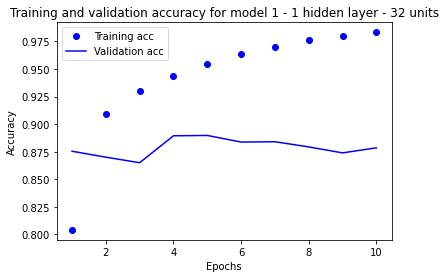

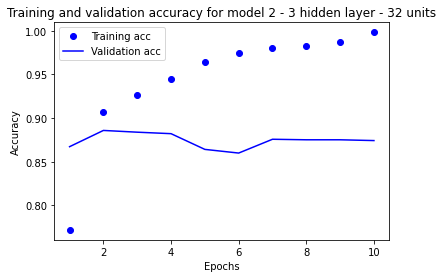

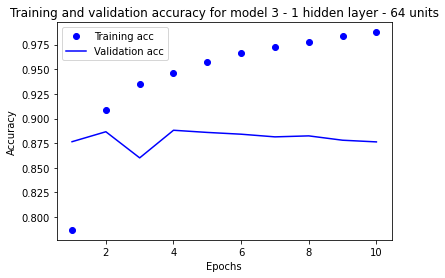

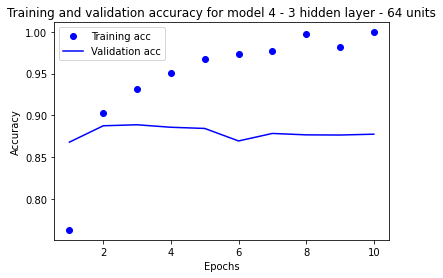

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))


epochs = range(1, 11)

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

plt.clf()   # clear figure

plt.plot(epochs, acc1, 'bo', label='Training acc')
plt.plot(epochs, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy for model 1 - 1 hidden layer - 32 units')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

plt.clf()   # clear figure

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy for model 2 - 3 hidden layer - 32 units')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

plt.clf()   # clear figure

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy for model 3 - 1 hidden layer - 64 units')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']

plt.clf()   # clear figure

plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy for model 4 - 3 hidden layer - 64 units')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
val_acc1_best_value = max(val_acc1)
print(val_acc1_best_value)

val_acc2_best_value = max(val_acc2)
print(val_acc2_best_value)

val_acc3_best_value = max(val_acc3)
print(val_acc3_best_value)

val_acc4_best_value = max(val_acc4)
print(val_acc4_best_value)

list_of_best_value = [val_acc1_best_value, val_acc2_best_value, val_acc3_best_value, val_acc4_best_value]

if max(list_of_best_value) == val_acc1_best_value :
    print("Best model is model 1")

if max(list_of_best_value) == val_acc2_best_value :
    print("Best model is model 2")

if max(list_of_best_value) == val_acc3_best_value :
    print("Best model is model 3")

if max(list_of_best_value) == val_acc4_best_value :
    print("Best model is model 4")


0.8896999955177307
0.8859000205993652
0.8881000280380249
0.8885999917984009
Best model is model 1


#END of PART 1